In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Books dataset

In [72]:
df = pd.read_csv("C:\\Users\\krush\\Desktop\\Data Science\\Assignments\\Association Rules\\book.csv", encoding='latin-1')
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


## Model Building

### Model 1 - support = 2%, confidence = 20%

In [73]:
books1 = apriori(df, min_support=0.02, use_colnames=True)
books1

C:\Users\krush\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(YouthBks, DoItYBks, ChildBks, RefBks, ArtBks,..."
272,0.0270,"(YouthBks, DoItYBks, ChildBks, RefBks, GeogBks..."
273,0.0310,"(YouthBks, DoItYBks, ChildBks, ArtBks, GeogBks..."
274,0.0225,"(YouthBks, ChildBks, ArtBks, RefBks, GeogBks, ..."


In [74]:
model1 = association_rules(books1, metric='lift', min_threshold=0.2)

In [75]:
model1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
3225,(ChildBks),"(DoItYBks, RefBks, ArtBks, GeogBks, CookBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996
3226,(ArtBks),"(DoItYBks, ChildBks, RefBks, GeogBks, CookBks)",0.2410,0.0450,0.024,0.099585,2.213001,0.013155,1.060622
3227,(RefBks),"(DoItYBks, ChildBks, ArtBks, GeogBks, CookBks)",0.2145,0.0535,0.024,0.111888,2.091367,0.012524,1.065744
3228,(GeogBks),"(DoItYBks, ChildBks, RefBks, ArtBks, CookBks)",0.2760,0.0370,0.024,0.086957,2.350176,0.013788,1.054714


In [76]:
model1[model1['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
3225,(ChildBks),"(DoItYBks, RefBks, ArtBks, GeogBks, CookBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996
3226,(ArtBks),"(DoItYBks, ChildBks, RefBks, GeogBks, CookBks)",0.2410,0.0450,0.024,0.099585,2.213001,0.013155,1.060622
3227,(RefBks),"(DoItYBks, ChildBks, ArtBks, GeogBks, CookBks)",0.2145,0.0535,0.024,0.111888,2.091367,0.012524,1.065744
3228,(GeogBks),"(DoItYBks, ChildBks, RefBks, ArtBks, CookBks)",0.2760,0.0370,0.024,0.086957,2.350176,0.013788,1.054714


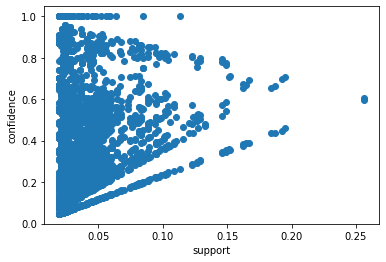

In [77]:
plt.scatter(model1['support'],model1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### Model 2 support = 2%, confidence = 40%

In [86]:
books2 = apriori(df, min_support=0.02, use_colnames=True)
books2

C:\Users\krush\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(YouthBks, DoItYBks, ChildBks, RefBks, ArtBks,..."
272,0.0270,"(YouthBks, DoItYBks, ChildBks, RefBks, GeogBks..."
273,0.0310,"(YouthBks, DoItYBks, ChildBks, ArtBks, GeogBks..."
274,0.0225,"(YouthBks, ChildBks, ArtBks, RefBks, GeogBks, ..."


In [87]:
model2 = association_rules(books2, metric='lift', min_threshold=0.4)
model2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
3225,(ChildBks),"(DoItYBks, RefBks, ArtBks, GeogBks, CookBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996
3226,(ArtBks),"(DoItYBks, ChildBks, RefBks, GeogBks, CookBks)",0.2410,0.0450,0.024,0.099585,2.213001,0.013155,1.060622
3227,(RefBks),"(DoItYBks, ChildBks, ArtBks, GeogBks, CookBks)",0.2145,0.0535,0.024,0.111888,2.091367,0.012524,1.065744
3228,(GeogBks),"(DoItYBks, ChildBks, RefBks, ArtBks, CookBks)",0.2760,0.0370,0.024,0.086957,2.350176,0.013788,1.054714


In [88]:
model2[model2['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
3225,(ChildBks),"(DoItYBks, RefBks, ArtBks, GeogBks, CookBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996
3226,(ArtBks),"(DoItYBks, ChildBks, RefBks, GeogBks, CookBks)",0.2410,0.0450,0.024,0.099585,2.213001,0.013155,1.060622
3227,(RefBks),"(DoItYBks, ChildBks, ArtBks, GeogBks, CookBks)",0.2145,0.0535,0.024,0.111888,2.091367,0.012524,1.065744
3228,(GeogBks),"(DoItYBks, ChildBks, RefBks, ArtBks, CookBks)",0.2760,0.0370,0.024,0.086957,2.350176,0.013788,1.054714


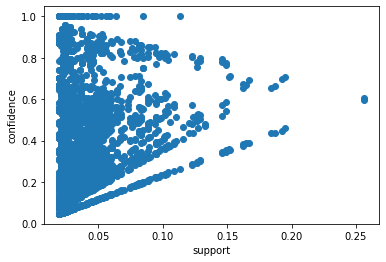

In [89]:
plt.scatter(model2['support'],model2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### Model 3 - support = 4%, confidence = 40%

In [90]:
books3 = apriori(df, min_support=0.04, use_colnames=True)
books3

C:\Users\krush\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(YouthBks, ChildBks, RefBks, GeogBks, CookBks)"
129,0.0465,"(YouthBks, ChildBks, ArtBks, GeogBks, CookBks)"
130,0.0450,"(DoItYBks, ChildBks, RefBks, GeogBks, CookBks)"
131,0.0535,"(DoItYBks, ChildBks, ArtBks, GeogBks, CookBks)"


In [92]:
model3 = association_rules(books3, metric='lift', min_threshold=0.4)
model3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1061,(ChildBks),"(RefBks, CookBks, GeogBks, ArtBks)",0.4230,0.0460,0.0405,0.095745,2.081406,0.021042,1.055012
1062,(ArtBks),"(CookBks, ChildBks, GeogBks, RefBks)",0.2410,0.0785,0.0405,0.168050,2.140762,0.021582,1.107638
1063,(RefBks),"(CookBks, ChildBks, GeogBks, ArtBks)",0.2145,0.0835,0.0405,0.188811,2.261212,0.022589,1.129823
1064,(GeogBks),"(RefBks, CookBks, ChildBks, ArtBks)",0.2760,0.0610,0.0405,0.146739,2.405560,0.023664,1.100484


In [93]:
model3[model3['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1061,(ChildBks),"(RefBks, CookBks, GeogBks, ArtBks)",0.4230,0.0460,0.0405,0.095745,2.081406,0.021042,1.055012
1062,(ArtBks),"(CookBks, ChildBks, GeogBks, RefBks)",0.2410,0.0785,0.0405,0.168050,2.140762,0.021582,1.107638
1063,(RefBks),"(CookBks, ChildBks, GeogBks, ArtBks)",0.2145,0.0835,0.0405,0.188811,2.261212,0.022589,1.129823
1064,(GeogBks),"(RefBks, CookBks, ChildBks, ArtBks)",0.2760,0.0610,0.0405,0.146739,2.405560,0.023664,1.100484


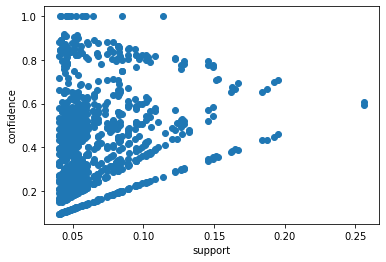

In [94]:
plt.scatter(model3['support'],model3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# Movies Dataset

In [4]:
df2 = pd.read_csv("C:\\Users\\krush\\Desktop\\Data Science\\Assignments\\Association Rules\\my_movies.csv", encoding='latin-1')
df2

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
df2.drop(columns=['V1', 'V2', 'V3', 'V4', 'V5'], inplace= True)

In [6]:
df2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## Model Building

### Model 1 - support = 5%, confidence = 30%

In [32]:
movies1 = apriori(df2, min_support=0.05, use_colnames=True)
movies1 

C:\Users\krush\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [12]:
model_1 = association_rules(movies1, metric='lift', min_threshold=0.3)
model_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Sixth Sense),"(LOTR1, LOTR2, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
247,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [13]:
model_1[model_1['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Sixth Sense),"(LOTR1, LOTR2, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
247,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


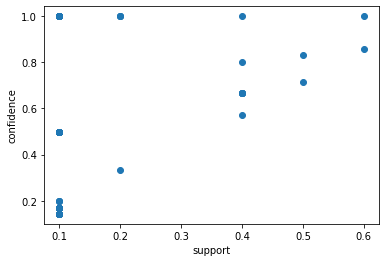

In [14]:
plt.scatter(model_1['support'],model_1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### Model 2 - support = 7%, confidence = 50%

In [15]:
movies2 = apriori(df2, min_support=0.07, use_colnames=True)
movies2 

C:\Users\krush\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [16]:
model_2 = association_rules(movies1, metric='lift', min_threshold=0.5)
model_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Sixth Sense),"(LOTR1, LOTR2, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
247,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [17]:
model_2[model_2['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(LOTR2, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Sixth Sense),"(LOTR1, LOTR2, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
247,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


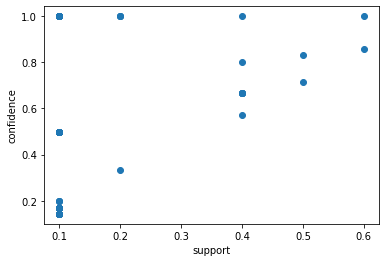

In [18]:
plt.scatter(model_2['support'],model_2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### Model 3 - support = 15%, confidence = 50%

In [39]:
movies3 = apriori(df2, min_support=0.15, use_colnames=True)
movies3

C:\Users\krush\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Sixth Sense, Green Mile)"


In [40]:
model_3 = association_rules(movies3, metric='lift', min_threshold=0.5)
model_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [41]:
model_3[model_3['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


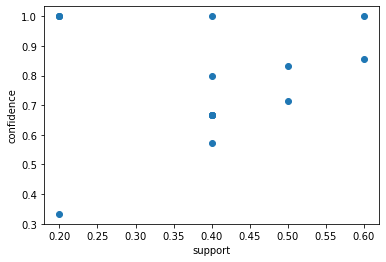

In [42]:
plt.scatter(model_3['support'],model_3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### Model 4 - support = 20%, confidence = 80%

In [28]:
movies4 = apriori(df2, min_support=0.2, use_colnames=True)
movies4 

C:\Users\krush\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Sixth Sense, Green Mile)"


In [33]:
model_4 = association_rules(movies4, metric='lift', min_threshold=0.8)
model_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [34]:
model_4[model_4['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


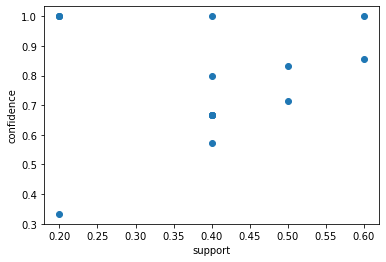

In [35]:
plt.scatter(model_4['support'],model_4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

#### Observations 
1. Lower the Confidence level Higher the no. of rules and vice-versa
2. Higher the Support, lower the no. of rules.
3. Higher the max length , higher the no.of rules
So, we can conclude that these 3 parameters different combinations can generate different rules.

## End